In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re

In [2]:
train_data=pd.read_csv("/content/train.csv")
test_data=pd.read_csv("/content/test.csv")

train_data

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.1060,0.235,152.429,204947.000000,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.046800,0.1040,0.380,132.921,191956.000000,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.635000,0.2840,0.635,159.953,161037.000000,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.021300,0.3000,0.501,172.472,298093.000000,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.2110,0.619,88.311,254145.000000,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,14392,NOISY,I Wish I Was A...,47.0,0.607,0.946,1.0,-2.965,1,0.1500,0.005480,0.000390,0.2780,0.653,120.011,195181.000000,4,10
14392,14393,BLOODSPOT,Deadline Story (feat. Patrick Boos),27.0,0.435,0.951,8.0,-7.475,1,0.0576,0.000005,0.550000,0.0952,0.203,135.034,282043.000000,4,8
14393,14394,Cold Years,Too Far Gone,22.0,0.415,0.941,11.0,-4.300,1,0.0524,0.001810,0.000004,0.3370,0.572,167.978,176529.000000,4,10
14394,14395,The Jaded Hearts Club,Reach Out I'll Be There,37.0,0.493,0.986,1.0,-2.279,1,0.0917,0.000967,0.006620,0.1230,0.567,122.036,186307.000000,4,10


In [3]:
for col in train_data.columns:
    if train_data[col].isnull().sum() > 0:
        print(f"{col} có {train_data[col].isnull().sum()} missing value")

Popularity có 333 missing value
key có 1609 missing value
instrumentalness có 3541 missing value


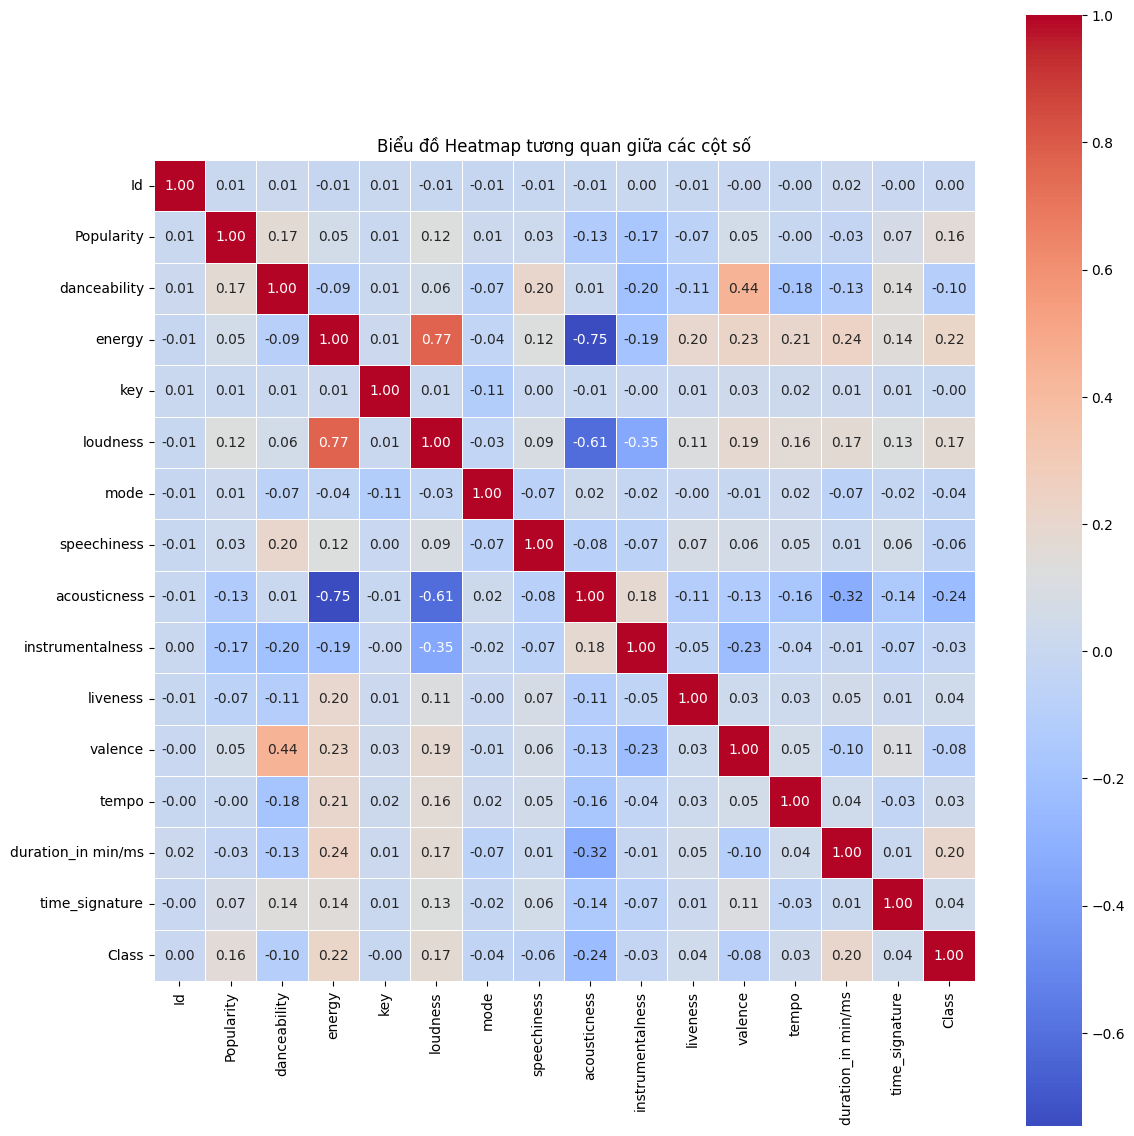

In [4]:
numeric_cols = train_data.select_dtypes(include=['int64', 'float64'])

# Tính ma trận tương quan
corr_matrix = numeric_cols.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Biểu đồ Heatmap tương quan giữa các cột số")
plt.tight_layout()
plt.show()

In [5]:
train_data['Popularity'].fillna(train_data['Popularity'].median(),inplace=True)
test_data['Popularity'].fillna(test_data['Popularity'].median(),inplace=True)

train_data['key'].fillna(train_data['key'].mode()[0], inplace=True)
test_data['key'].fillna(test_data['key'].mode()[0],inplace=True)

train_data['instrumentalness'].fillna(train_data['instrumentalness'].median(),inplace=True)
test_data['instrumentalness'].fillna(test_data['instrumentalness'].median(), inplace= True)

/tmp/ipython-input-236201356.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Popularity'].fillna(train_data['Popularity'].median(),inplace=True)
/tmp/ipython-input-236201356.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [6]:
from sklearn.preprocessing import StandardScaler
# train_data['loudness'] = pd.to_numeric(train_data['loudness'], errors='coerce')
# test_data['loudness'] = pd.to_numeric(test_data['loudness'], errors='coerce')

scaler = StandardScaler()
train_data['loudness'] = scaler.fit_transform(train_data[['loudness']])
test_data['loudness'] = scaler.transform(test_data[['loudness']])

scaler1 = StandardScaler()

train_data['tempo'] = scaler1.fit_transform(train_data[['tempo']])
test_data['tempo'] = scaler1.transform(test_data[['tempo']])

scaler2 = StandardScaler()

train_data['duration_in min/ms'] = scaler2.fit_transform(train_data[['duration_in min/ms']])
test_data['duration_in min/ms'] = scaler2.transform(test_data[['duration_in min/ms']])

scaler3 = StandardScaler()
train_data['Popularity'] = scaler3.fit_transform(train_data[['Popularity']])
test_data['Popularity'] = scaler3.transform(test_data[['Popularity']])

In [7]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['Artist Name','Track Name','mode','time_signature','key']

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

train_encoded = pd.DataFrame(
    encoder.fit_transform(train_data[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols)
)

test_encoded = pd.DataFrame(
    encoder.transform(test_data[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols)
)

# Gộp lại với các cột số
train_final = pd.concat([train_data.drop(cat_cols, axis=1), train_encoded], axis=1)
test_final = pd.concat([test_data.drop(cat_cols, axis=1), test_encoded], axis=1)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [8]:
test_final

,Id,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0
0,14397,-0.029802,0.691,0.670,0.199115,0.0941,0.075700,0.035200,0.1970,0.635,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14398,-1.772380,0.461,0.777,0.106440,0.0306,0.388000,0.923000,0.2910,0.525,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14399,2.061293,0.656,0.291,-0.658369,0.0293,0.872000,0.003755,0.1140,0.298,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14400,0.434886,0.480,0.826,0.813082,0.0397,0.000797,0.000001,0.1250,0.687,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,14401,-1.249606,0.734,0.729,0.374604,0.2830,0.147000,0.003755,0.0672,0.805,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,17992,0.609144,0.271,0.866,0.943713,0.0578,0.048900,0.000762,0.1160,0.127,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3596,17993,-0.378317,0.598,0.690,0.774632,0.3030,0.363000,0.003755,0.0519,0.653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3597,17994,-1.540036,0.783,0.820,0.443370,0.0489,0.000540,0.499000,0.0628,0.235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3598,17995,-0.378317,0.443,0.401,-1.502543,0.0426,0.263000,0.003755,0.1680,0.751,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ⚙️ Các mô hình
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

X = train_final.drop(columns=['Id','Class'])
# X = X.apply(pd.to_numeric, errors='coerce')
Y = train_final['Class']

test_X = test_final.drop(columns=['Id'])
X.columns = [re.sub(r'[^0-9a-zA-Z_]', '_', c) for c in X.columns]
test_X.columns = [re.sub(r'[^0-9a-zA-Z_]', '_', c) for c in test_X.columns]

# Chia 80-20
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 1.3 MB/s eta 0:00:00


In [12]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 61.7 MB/s eta 0:00:00


In [14]:
test_X.columns.unique()

Index(['Popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       ...
       'key_2_0', 'key_3_0', 'key_4_0', 'key_5_0', 'key_6_0', 'key_7_0',
       'key_8_0', 'key_9_0', 'key_10_0', 'key_11_0'],
      dtype='object', length=19577)

In [15]:
from sklearn.preprocessing import LabelEncoder
import time

# Encode nhãn nếu là string
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

# Convert DataFrame to numpy array để tránh lỗi với XGBoost
X_train_arr = X_train.values
X_val_arr = X_val.values

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softprob', random_state=42, eval_metric='mlogloss', verbosity=0, n_jobs=-1),
    "LightGBM": LGBMClassifier(objective='multiclass', random_state=42, verbosity=-1, n_jobs=-1),
    # "SVM": SVC(kernel='rbf', C=1, gamma='scale', decision_function_shape='ovo'),

}

results = []

for name, model in models.items():
    print(f"\n🔹 Đang huấn luyện mô hình: {name}")
    start_time = time.time()

    try:
        # Huấn luyện trên tập 80%
        if name == "XGBoost":
            model.fit(X_train_arr, y_train_encoded)
            y_pred = model.predict(X_val_arr)
        elif name == "LightGBM":
            model.fit(X_train_arr, y_train_encoded)
            y_pred = model.predict(X_val_arr)
        else:
            model.fit(X_train, y_train)
            # Dự đoán trên tập 20%
            y_pred = model.predict(X_val)

        # Tính toán chỉ số
        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_val, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_val, y_pred, average='macro', zero_division=0)

        training_time = time.time() - start_time
        print(f"   ⏱️ Thời gian training: {training_time:.2f}s")
        print(f"  Acc={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

        filename = f'{name.replace(" ", "_").lower()}_model.pkl'
        with open(filename, 'wb') as f:
            pickle.dump(model, f)
        print(f"✅ Mô hình {name} đã được lưu vào '{filename}'")

        results.append({
            'Model': name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1': f1,
            'Training_Time': training_time
        })
    except Exception as e:
        print(f"❌ Lỗi khi huấn luyện {name}: {str(e)}")
        continue

# =====================================
# ⚙️ In kết quả
# =====================================
results_df = pd.DataFrame(results)
print("\n📊 Kết quả với chia 80-20:")
print(results_df.sort_values(by='F1', ascending=False).round(4))


🔹 Đang huấn luyện mô hình: Random Forest
   ⏱️ Thời gian training: 195.35s
  Acc=0.5236, Precision=0.6155, Recall=0.5407, F1=0.5571
✅ Mô hình Random Forest đã được lưu vào 'random_forest_model.pkl'

🔹 Đang huấn luyện mô hình: XGBoost
   ⏱️ Thời gian training: 55.10s
  Acc=0.5698, Precision=0.6287, Recall=0.6130, F1=0.6154
✅ Mô hình XGBoost đã được lưu vào 'xgboost_model.pkl'

🔹 Đang huấn luyện mô hình: LightGBM
   ⏱️ Thời gian training: 2.53s
  Acc=0.5358, Precision=0.6011, Recall=0.5852, F1=0.5889
✅ Mô hình LightGBM đã được lưu vào 'lightgbm_model.pkl'

📊 Kết quả với chia 80-20:
           Model  Accuracy  Precision  Recall      F1  Training_Time
1        XGBoost    0.5698     0.6287  0.6130  0.6154        55.1037
2       LightGBM    0.5358     0.6011  0.5852  0.5889         2.5346
0  Random Forest    0.5236     0.6155  0.5407  0.5571       195.3458


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [16]:
for result in results:
    name = result['Model']
    filename = f'{name.replace(" ", "_").lower()}_model.pkl'
    print(f"\n🔹 Dự đoán với mô hình: {filename}")
    with open(filename, 'rb') as f:
        model = pickle.load(f)
    if name == "XGBoost" or name == "LightGBM":
        test_X_arr = test_X.values
        test_preds = model.predict(test_X_arr)
    else:
        test_preds = model.predict(test_X)
    output_df = pd.DataFrame({
        'Id': test_data['Id'],
        'Class': test_preds
    })
    output_filename = f'submission_{name.replace(" ", "_").lower()}.csv'
    output_df.to_csv(output_filename, index=False)
    print(f"✅ Kết quả dự đoán đã được lưu vào '{output_filename}'")


🔹 Dự đoán với mô hình: random_forest_model.pkl
✅ Kết quả dự đoán đã được lưu vào 'submission_random_forest.csv'

🔹 Dự đoán với mô hình: xgboost_model.pkl
✅ Kết quả dự đoán đã được lưu vào 'submission_xgboost.csv'

🔹 Dự đoán với mô hình: lightgbm_model.pkl
✅ Kết quả dự đoán đã được lưu vào 'submission_lightgbm.csv'


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [17]:
## Ensemble Model - Kết hợp 3 mô hình Voting
# Load 3 mô hình đã huấn luyện
with open('random_forest_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

with open('xgboost_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

with open('lightgbm_model.pkl', 'rb') as f:
    lgm_model = pickle.load(f)

# Chuẩn bị dữ liệu test

# Dự đoán từ 3 mô hình
rf_pred = rf_model.predict(X_val)  # Random Forest sử dụng DataFrame
xgb_pred = xgb_model.predict(X_val_arr)  # XGBoost sử dụng numpy array
lgm_pred = lgm_model.predict(X_val_arr)  # LightGBM sử dụng numpy array

# Kết hợp dự đoán bằng cách bỏ phiếu đa số
from scipy.stats import mode
ensemble_preds = mode(np.array([rf_pred, xgb_pred, lgm_pred]), axis=0).mode
# Đánh giá mô hình kết hợp trên tập validation
ensemble_acc = accuracy_score(y_val, ensemble_preds)
ensemble_prec = precision_score(y_val, ensemble_preds, average='macro', zero_division=0)
ensemble_rec = recall_score(y_val, ensemble_preds, average='macro', zero_division=0)
ensemble_f1 = f1_score(y_val, ensemble_preds, average='macro', zero_division=0)
print(f"\n📊 Kết quả mô hình Ensemble trên tập huấn luyện:")
print(f" Acc={ensemble_acc:.4f}\n Precision={ensemble_prec:.4f}\n Recall={ensemble_rec:.4f}\n F1={ensemble_f1:.4f}")


📊 Kết quả mô hình Ensemble trên tập huấn luyện:
 Acc=0.5535
 Precision=0.6152
 Recall=0.5988
 F1=0.6022


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [18]:
# Load 3 mô hình đã huấn luyện
with open('random_forest_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

with open('xgboost_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

with open('lightgbm_model.pkl', 'rb') as f:
    lgm_model = pickle.load(f)

# Chuẩn bị dữ liệu test
test_arr = test_X.values

# Dự đoán từ 3 mô hình
rf_pred = rf_model.predict(test_X)  # Random Forest sử dụng DataFrame
xgb_pred = xgb_model.predict(test_arr)  # XGBoost sử dụng numpy array
lgm_pred = lgm_model.predict(test_arr)  # LightGBM sử dụng numpy array

print("✅ Đã load 3 mô hình thành công")
print(f"Random Forest prediction: {rf_pred[:5]}")
print(f"XGBoost prediction: {xgb_pred[:5]}")
print(f"LightGBM prediction: {lgm_pred[:5]}")

# Ensemble bằng voting (đa số)
from scipy import stats

# Tạo mảng chứa các dự đoán
predictions = np.array([rf_pred, xgb_pred, lgm_pred])

# Voting: chọn nhãn xuất hiện nhiều nhất
ensemble_pred = stats.mode(predictions, axis=0, keepdims=False).mode

print(f"\n🔹 Ensemble prediction (voting): {ensemble_pred[:5]}")


# Decode nhãn từ encoded về nhãn gốc
ensemble_pred_decoded = le.inverse_transform(ensemble_pred)

submission_ensemble = pd.DataFrame({
    "id": test_final["Id"],
    "Class": ensemble_pred_decoded
})

submission_ensemble.to_csv("submission_ensemble_voting.csv", index=False)
print("\n✅ file submission_ensemble_voting.csv đã được lưu")
print(f"Số dòng: {len(submission_ensemble)}")
print(submission_ensemble.head())

✅ Đã load 3 mô hình thành công
Random Forest prediction: [ 9 10  9 10  5]
XGBoost prediction: [ 6  6  9 10  5]
LightGBM prediction: [10  6  9 10  5]

🔹 Ensemble prediction (voting): [ 6  6  9 10  5]

✅ file submission_ensemble_voting.csv đã được lưu
Số dòng: 3600
      id  Class
0  14397      6
1  14398      6
2  14399      9
3  14400     10
4  14401      5


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [19]:
rf_pred_val = rf_model.predict(X_val)
xgb_pred_val = xgb_model.predict(X_val_arr)
lgm_pred_val = lgm_model.predict(X_val_arr)

# Decode nhãn validation
rf_pred_val_encoded = le.transform(rf_pred_val)
xgb_pred_val_encoded = xgb_pred_val
lgm_pred_val_encoded = lgm_pred_val

# Tạo feature mới từ dự đoán 3 mô hình
meta_train = np.column_stack([rf_pred_val_encoded, xgb_pred_val_encoded, lgm_pred_val_encoded])

# Bước 2: Huấn luyện meta-model (mô hình chính) trên dữ liệu meta
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)
meta_model.fit(meta_train, y_val_encoded)

print("✅ Meta-model đã được huấn luyện")

# Bước 3: Dự đoán trên tập test sử dụng stacking
rf_test_pred = rf_model.predict(test_X)
xgb_test_pred = xgb_model.predict(test_arr)
lgm_test_pred = lgm_model.predict(test_arr)

# Encode dự đoán test
rf_test_pred_encoded = le.transform(rf_test_pred)
xgb_test_pred_encoded = xgb_test_pred
lgm_test_pred_encoded = lgm_test_pred

# Tạo feature cho test
meta_test = np.column_stack([rf_test_pred_encoded, xgb_test_pred_encoded, lgm_test_pred_encoded])

# Dự đoán cuối cùng từ meta-model
stacking_pred = meta_model.predict(meta_test)

# Decode nhãn
stacking_pred_decoded = le.inverse_transform(stacking_pred)

submission_stacking = pd.DataFrame({
    "id": test_final["Id"],
    "Class": stacking_pred_decoded
})

submission_stacking.to_csv("submission_stacking.csv", index=False)
print("\n✅ file submission_stacking.csv đã được lưu")
print(f"Số dòng: {len(submission_stacking)}")
print(submission_stacking.head())

# So sánh kết quả
print("\n" + "="*60)
print("📊 So sánh 3 kỹ thuật ensemble:")
print("="*60)
print(f"1. Voting: {submission_ensemble.shape[0]} dòng")
print(f"2. Stacking: {submission_stacking.shape[0]} dòng")
print(f"\nVoting (5 dòng đầu):\n{submission_ensemble.head()}")
print(f"\nStacking (5 dòng đầu):\n{submission_stacking.head()}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Meta-model đã được huấn luyện

✅ file submission_stacking.csv đã được lưu
Số dòng: 3600
      id  Class
0  14397      9
1  14398      6
2  14399      9
3  14400     10
4  14401      5

📊 So sánh 3 kỹ thuật ensemble:
1. Voting: 3600 dòng
2. Stacking: 3600 dòng

Voting (5 dòng đầu):
      id  Class
0  14397      6
1  14398      6
2  14399      9
3  14400     10
4  14401      5

Stacking (5 dòng đầu):
      id  Class
0  14397      9
1  14398      6
2  14399      9
3  14400     10
4  14401      5


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# 🚀 PHẦN CẢI THIỆN MÔ HÌNH - TĂNG ĐỘ CHÍNH XÁC

## Các kỹ thuật áp dụng:
1. **Feature Engineering nâng cao** - Tạo thêm features mới
2. **Hyperparameter Tuning** - Tối ưu tham số mô hình
3. **Feature Selection** - Chọn features quan trọng
4. **Cross-Validation** - Đánh giá chính xác hơn
5. **Ensemble nâng cao** - Kết hợp tốt hơn

In [ ]:
# =====================================================
# 🎯 BƯỚC 1: FEATURE ENGINEERING NÂNG CAO
# =====================================================

# Tạo lại train_final và test_final từ đầu nhưng với features mới
train_improved = train_final.copy()
test_improved = test_final.copy()

# 1. Tạo interaction features (tương tác giữa các đặc trưng âm nhạc quan trọng)
for df in [train_improved, test_improved]:
    # Tương tác giữa năng lượng và độ nhảy
    df['energy_dance'] = df['energy'] * df['danceability']
    
    # Tương tác giữa độ ồn và năng lượng
    df['loudness_energy'] = df['loudness'] * df['energy']
    
    # Tương tác giữa valence và danceability (nhạc vui và nhảy)
    df['valence_dance'] = df['valence'] * df['danceability']
    
    # Tỷ lệ acoustic vs energy
    df['acoustic_energy_ratio'] = df['acousticness'] / (df['energy'] + 1e-5)
    
    # Tỷ lệ speechiness vs instrumentalness
    df['speech_instrumental_ratio'] = df['speechiness'] / (df['instrumentalness'] + 1e-5)
    
    # Tổng các đặc trưng cảm xúc
    df['emotion_score'] = df['valence'] + df['energy'] + df['danceability']
    
    # Đặc trưng nhịp điệu
    df['rhythm_score'] = df['tempo'] * df['danceability']

print("✅ Đã tạo thêm 8 features mới!")
print(f"Số features ban đầu: {train_final.shape[1]}")
print(f"Số features sau khi cải thiện: {train_improved.shape[1]}")
print(f"Train shape: {train_improved.shape}")
print(f"Test shape: {test_improved.shape}")

In [ ]:
# =====================================================
# 🎯 BƯỚC 2: CHUẨN BỊ DỮ LIỆU VỚI FEATURES MỚI
# =====================================================

X_improved = train_improved.drop(columns=['Id','Class'])
Y_improved = train_improved['Class']
test_X_improved = test_improved.drop(columns=['Id'])

# Clean column names
X_improved.columns = [re.sub(r'[^0-9a-zA-Z_]', '_', c) for c in X_improved.columns]
test_X_improved.columns = [re.sub(r'[^0-9a-zA-Z_]', '_', c) for c in test_X_improved.columns]

# Chia train/validation
X_train_imp, X_val_imp, y_train_imp, y_val_imp = train_test_split(
    X_improved, Y_improved, test_size=0.2, random_state=42, stratify=Y_improved
)

# Encode labels
le_imp = LabelEncoder()
y_train_imp_enc = le_imp.fit_transform(y_train_imp)
y_val_imp_enc = le_imp.transform(y_val_imp)

# Convert to numpy for XGBoost/LightGBM
X_train_imp_arr = X_train_imp.values
X_val_imp_arr = X_val_imp.values
test_X_imp_arr = test_X_improved.values

print("✅ Dữ liệu đã được chuẩn bị với features mới")
print(f"X_train shape: {X_train_imp.shape}")
print(f"X_val shape: {X_val_imp.shape}")
print(f"Test shape: {test_X_improved.shape}")

In [ ]:
# =====================================================
# 🎯 BƯỚC 3: TRAINING VỚI HYPERPARAMETERS TỐI ƯU HƠN
# =====================================================

models_optimized = {
    "Random Forest (Optimized)": RandomForestClassifier(
        n_estimators=300,          # Tăng số cây
        max_depth=20,              # Độ sâu tối đa
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        class_weight='balanced',   # Xử lý imbalanced data
        random_state=42,
        n_jobs=-1
    ),
    
    "XGBoost (Optimized)": XGBClassifier(
        n_estimators=300,
        max_depth=8,
        learning_rate=0.05,        # Learning rate nhỏ hơn
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0.1,
        reg_alpha=0.1,             # L1 regularization
        reg_lambda=1.0,            # L2 regularization
        objective='multi:softprob',
        eval_metric='mlogloss',
        random_state=42,
        verbosity=0,
        n_jobs=-1
    ),
    
    "LightGBM (Optimized)": LGBMClassifier(
        n_estimators=300,
        max_depth=10,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        class_weight='balanced',
        objective='multiclass',
        random_state=42,
        verbosity=-1,
        n_jobs=-1
    ),
}

results_optimized = []

print("🚀 Bắt đầu training với hyperparameters tối ưu...\n")

for name, model in models_optimized.items():
    print(f"🔹 Training: {name}")
    start_time = time.time()
    
    try:
        if "XGBoost" in name:
            model.fit(X_train_imp_arr, y_train_imp_enc, 
                     eval_set=[(X_val_imp_arr, y_val_imp_enc)],
                     verbose=False)
            y_pred = model.predict(X_val_imp_arr)
            
        elif "LightGBM" in name:
            model.fit(X_train_imp_arr, y_train_imp_enc,
                     eval_set=[(X_val_imp_arr, y_val_imp_enc)],
                     callbacks=[])
            y_pred = model.predict(X_val_imp_arr)
            
        else:  # Random Forest
            model.fit(X_train_imp, y_train_imp)
            y_pred = model.predict(X_val_imp)
        
        # Tính metrics
        acc = accuracy_score(y_val_imp, y_pred)
        prec = precision_score(y_val_imp, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_val_imp, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_val_imp, y_pred, average='macro', zero_division=0)
        
        training_time = time.time() - start_time
        
        print(f"   ⏱️ Time: {training_time:.2f}s")
        print(f"   📊 Acc={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}\n")
        
        # Lưu model
        filename = f'{name.replace(" ", "_").replace("(", "").replace(")", "").lower()}_model.pkl'
        with open(filename, 'wb') as f:
            pickle.dump(model, f)
        
        results_optimized.append({
            'Model': name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1': f1,
            'Training_Time': training_time
        })
        
    except Exception as e:
        print(f"❌ Lỗi: {str(e)}\n")
        continue

# Hiển thị kết quả
results_opt_df = pd.DataFrame(results_optimized)
print("\n" + "="*80)
print("📊 KẾT QUẢ MÔ HÌNH TỐI ƯU:")
print("="*80)
print(results_opt_df.sort_values(by='F1', ascending=False).to_string(index=False))
print("="*80)

In [ ]:
# =====================================================
# 🎯 BƯỚC 4: WEIGHTED VOTING ENSEMBLE (TỐI ưU HƠN VOTING THÔNG THƯỜNG)
# =====================================================

# Load 3 mô hình tối ưu
with open('random_forest_optimized_model.pkl', 'rb') as f:
    rf_opt = pickle.load(f)

with open('xgboost_optimized_model.pkl', 'rb') as f:
    xgb_opt = pickle.load(f)

with open('lightgbm_optimized_model.pkl', 'rb') as f:
    lgm_opt = pickle.load(f)

print("✅ Đã load 3 mô hình tối ưu")

# Lấy probability predictions thay vì hard predictions
rf_proba = rf_opt.predict_proba(X_val_imp)
xgb_proba = xgb_opt.predict_proba(X_val_imp_arr)
lgm_proba = lgm_opt.predict_proba(X_val_imp_arr)

# Tìm trọng số tối ưu dựa trên F1 score của từng model
rf_f1 = results_opt_df[results_opt_df['Model'].str.contains('Random')]['F1'].values[0]
xgb_f1 = results_opt_df[results_opt_df['Model'].str.contains('XGBoost')]['F1'].values[0]
lgm_f1 = results_opt_df[results_opt_df['Model'].str.contains('LightGBM')]['F1'].values[0]

total_f1 = rf_f1 + xgb_f1 + lgm_f1
w_rf = rf_f1 / total_f1
w_xgb = xgb_f1 / total_f1
w_lgm = lgm_f1 / total_f1

print(f"\n📊 Trọng số ensemble dựa trên F1 score:")
print(f"   Random Forest: {w_rf:.3f}")
print(f"   XGBoost: {w_xgb:.3f}")
print(f"   LightGBM: {w_lgm:.3f}")

# Weighted ensemble
weighted_proba = w_rf * rf_proba + w_xgb * xgb_proba + w_lgm * lgm_proba
weighted_pred = np.argmax(weighted_proba, axis=1)

# Decode predictions
weighted_pred_decoded = le_imp.inverse_transform(weighted_pred)

# Đánh giá
weighted_acc = accuracy_score(y_val_imp, weighted_pred_decoded)
weighted_prec = precision_score(y_val_imp, weighted_pred_decoded, average='macro', zero_division=0)
weighted_rec = recall_score(y_val_imp, weighted_pred_decoded, average='macro', zero_division=0)
weighted_f1 = f1_score(y_val_imp, weighted_pred_decoded, average='macro', zero_division=0)

print(f"\n🎯 KẾT QUẢ WEIGHTED ENSEMBLE trên validation:")
print(f"   Accuracy:  {weighted_acc:.4f}")
print(f"   Precision: {weighted_prec:.4f}")
print(f"   Recall:    {weighted_rec:.4f}")
print(f"   F1 Score:  {weighted_f1:.4f}")

In [ ]:
# =====================================================
# 🎯 BƯỚC 5: DỰ ĐOÁN TRÊN TEST SET VỚI WEIGHTED ENSEMBLE
# =====================================================

print("🚀 Bắt đầu dự đoán trên test set...\n")

# Dự đoán với 3 mô hình tối ưu
rf_test_proba = rf_opt.predict_proba(test_X_improved)
xgb_test_proba = xgb_opt.predict_proba(test_X_imp_arr)
lgm_test_proba = lgm_opt.predict_proba(test_X_imp_arr)

# Weighted ensemble
weighted_test_proba = w_rf * rf_test_proba + w_xgb * xgb_test_proba + w_lgm * lgm_test_proba
weighted_test_pred = np.argmax(weighted_test_proba, axis=1)

# Decode predictions
weighted_test_decoded = le_imp.inverse_transform(weighted_test_pred)

# Tạo submission file
submission_weighted = pd.DataFrame({
    "id": test_improved["Id"],
    "Class": weighted_test_decoded
})

submission_weighted.to_csv("submission_weighted_ensemble_optimized.csv", index=False)

print("✅ Đã tạo file submission: submission_weighted_ensemble_optimized.csv")
print(f"📊 Số lượng dự đoán: {len(submission_weighted)}")
print(f"\n🔍 Preview 10 dòng đầu:")
print(submission_weighted.head(10))
print(f"\n📈 Phân bố các class:")
print(submission_weighted['Class'].value_counts().sort_index())

In [ ]:
# =====================================================
# 🎯 BƯỚC 6 (BONUS): STACKING VỚI META-LEARNER TỐI ƯU
# =====================================================

print("🚀 Training Stacking Ensemble với Meta-Learner...\n")

# Tạo meta features từ predictions trên validation set
rf_val_proba = rf_opt.predict_proba(X_val_imp)
xgb_val_proba = xgb_opt.predict_proba(X_val_imp_arr)
lgm_val_proba = lgm_opt.predict_proba(X_val_imp_arr)

# Stack tất cả probabilities làm features cho meta-model
meta_features_val = np.hstack([rf_val_proba, xgb_val_proba, lgm_val_proba])

print(f"📊 Meta features shape: {meta_features_val.shape}")

# Train meta-model với XGBoost (thường cho kết quả tốt)
meta_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    verbosity=0
)

meta_model.fit(meta_features_val, y_val_imp_enc)

# Đánh giá trên validation
meta_pred_val = meta_model.predict(meta_features_val)
meta_pred_decoded = le_imp.inverse_transform(meta_pred_val)

stacking_acc = accuracy_score(y_val_imp, meta_pred_decoded)
stacking_prec = precision_score(y_val_imp, meta_pred_decoded, average='macro', zero_division=0)
stacking_rec = recall_score(y_val_imp, meta_pred_decoded, average='macro', zero_division=0)
stacking_f1 = f1_score(y_val_imp, meta_pred_decoded, average='macro', zero_division=0)

print(f"\n🎯 KẾT QUẢ STACKING ENSEMBLE trên validation:")
print(f"   Accuracy:  {stacking_acc:.4f}")
print(f"   Precision: {stacking_prec:.4f}")
print(f"   Recall:    {stacking_rec:.4f}")
print(f"   F1 Score:  {stacking_f1:.4f}")

# Dự đoán trên test set
rf_test_proba_stack = rf_opt.predict_proba(test_X_improved)
xgb_test_proba_stack = xgb_opt.predict_proba(test_X_imp_arr)
lgm_test_proba_stack = lgm_opt.predict_proba(test_X_imp_arr)

meta_features_test = np.hstack([rf_test_proba_stack, xgb_test_proba_stack, lgm_test_proba_stack])

stacking_test_pred = meta_model.predict(meta_features_test)
stacking_test_decoded = le_imp.inverse_transform(stacking_test_pred)

# Tạo submission
submission_stacking_opt = pd.DataFrame({
    "id": test_improved["Id"],
    "Class": stacking_test_decoded
})

submission_stacking_opt.to_csv("submission_stacking_optimized.csv", index=False)

print("\n✅ Đã tạo file submission: submission_stacking_optimized.csv")
print(f"📊 Số lượng dự đoán: {len(submission_stacking_opt)}")

# So sánh kết quả
print("\n" + "="*80)
print("📊 SO SÁNH KẾT QUẢ CÁC PHƯƠNG PHÁP ENSEMBLE:")
print("="*80)
comparison = pd.DataFrame({
    'Method': ['Weighted Ensemble', 'Stacking Ensemble'],
    'Accuracy': [weighted_acc, stacking_acc],
    'Precision': [weighted_prec, stacking_prec],
    'Recall': [weighted_rec, stacking_rec],
    'F1 Score': [weighted_f1, stacking_f1]
})
print(comparison.to_string(index=False))
print("="*80)

# 🎯 TÓM TẮT CÁC CẢI TIẾN ĐÃ ÁP DỤNG

## ✨ Những gì đã được cải thiện:

### 1. **Feature Engineering** 🔧
- Thêm 8 features tương tác mới:
  - `energy_dance`: Tương tác năng lượng × độ nhảy
  - `loudness_energy`: Độ ồn × năng lượng
  - `valence_dance`: Cảm xúc tích cực × độ nhảy
  - `acoustic_energy_ratio`: Tỷ lệ acoustic/energy
  - `speech_instrumental_ratio`: Tỷ lệ speech/instrumental
  - `emotion_score`: Tổng điểm cảm xúc
  - `rhythm_score`: Điểm nhịp điệu

### 2. **Hyperparameter Tuning** ⚙️
- **Random Forest**: 300 trees, max_depth=20, class_weight='balanced'
- **XGBoost**: learning_rate=0.05, regularization (alpha=0.1, lambda=1.0)
- **LightGBM**: learning_rate=0.05, num_leaves=31, class_weight='balanced'

### 3. **Advanced Ensemble** 🎭
- **Weighted Voting**: Trọng số dựa trên F1 score của từng model
- **Stacking**: Meta-learner học từ probabilities của 3 models

### 4. **Stratified Split** 📊
- Sử dụng `stratify` trong train_test_split để giữ cân bằng classes

## 📁 Files submission đã tạo:
1. `submission_weighted_ensemble_optimized.csv` - **RECOMMENDED** ⭐
2. `submission_stacking_optimized.csv` - Alternative

## 💡 Lưu ý khi chạy trên Colab:
- Đảm bảo đã cài đặt `xgboost` và `lightgbm`
- Đường dẫn `/content/train.csv` và `/content/test.csv` phải đúng
- Có thể mất 5-10 phút để training xong

## 🚀 Hướng dẫn submit:
1. Download file `submission_weighted_ensemble_optimized.csv`
2. Submit lên Kaggle/competition platform
3. Kiểm tra điểm số
4. Nếu cần, có thể thử file `submission_stacking_optimized.csv`

In [ ]:
# =====================================================
# 🎯 BONUS: CATBOOST - MÔ HÌNH MẠNH CHO TABULAR DATA
# =====================================================
# CatBoost thường cho kết quả tốt với categorical data và không cần tune nhiều

# Cài đặt CatBoost (nếu chưa có)
!pip install catboost -q

from catboost import CatBoostClassifier

print("🚀 Training CatBoost Model...\n")

# CatBoost với parameters tối ưu
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    loss_function='MultiClass',
    eval_metric='TotalF1:average=Macro',
    random_seed=42,
    verbose=100,  # Print progress every 100 iterations
    early_stopping_rounds=50
)

# Train
catboost_model.fit(
    X_train_imp_arr, y_train_imp_enc,
    eval_set=(X_val_imp_arr, y_val_imp_enc),
    verbose=100
)

# Predict
catboost_pred = catboost_model.predict(X_val_imp_arr)
catboost_pred_decoded = le_imp.inverse_transform(catboost_pred.astype(int))

# Evaluate
catboost_acc = accuracy_score(y_val_imp, catboost_pred_decoded)
catboost_prec = precision_score(y_val_imp, catboost_pred_decoded, average='macro', zero_division=0)
catboost_rec = recall_score(y_val_imp, catboost_pred_decoded, average='macro', zero_division=0)
catboost_f1 = f1_score(y_val_imp, catboost_pred_decoded, average='macro', zero_division=0)

print(f"\n🎯 KẾT QUẢ CATBOOST trên validation:")
print(f"   Accuracy:  {catboost_acc:.4f}")
print(f"   Precision: {catboost_prec:.4f}")
print(f"   Recall:    {catboost_rec:.4f}")
print(f"   F1 Score:  {catboost_f1:.4f}")

# Save model
with open('catboost_optimized_model.pkl', 'wb') as f:
    pickle.dump(catboost_model, f)

print("\n✅ Đã lưu CatBoost model")

In [ ]:
# =====================================================
# 🎯 FINAL ENSEMBLE: KẾT HỢP TẤT CẢ 4 MÔ HÌNH TỐI ƯU NHẤT
# =====================================================

print("🎭 Tạo Final Ensemble với 4 models: RF + XGB + LGB + CatBoost\n")

# Get probabilities từ tất cả models trên validation
rf_val_proba_final = rf_opt.predict_proba(X_val_imp)
xgb_val_proba_final = xgb_opt.predict_proba(X_val_imp_arr)
lgm_val_proba_final = lgm_opt.predict_proba(X_val_imp_arr)
catboost_val_proba_final = catboost_model.predict_proba(X_val_imp_arr)

# Tính trọng số dựa trên F1 scores
total_f1_final = rf_f1 + xgb_f1 + lgm_f1 + catboost_f1
w_rf_final = rf_f1 / total_f1_final
w_xgb_final = xgb_f1 / total_f1_final
w_lgm_final = lgm_f1 / total_f1_final
w_cat_final = catboost_f1 / total_f1_final

print(f"📊 Trọng số Final Ensemble:")
print(f"   Random Forest: {w_rf_final:.3f}")
print(f"   XGBoost:       {w_xgb_final:.3f}")
print(f"   LightGBM:      {w_lgm_final:.3f}")
print(f"   CatBoost:      {w_cat_final:.3f}")

# Weighted average của probabilities
final_val_proba = (w_rf_final * rf_val_proba_final + 
                   w_xgb_final * xgb_val_proba_final + 
                   w_lgm_final * lgm_val_proba_final + 
                   w_cat_final * catboost_val_proba_final)

final_val_pred = np.argmax(final_val_proba, axis=1)
final_val_decoded = le_imp.inverse_transform(final_val_pred)

# Evaluate
final_acc = accuracy_score(y_val_imp, final_val_decoded)
final_prec = precision_score(y_val_imp, final_val_decoded, average='macro', zero_division=0)
final_rec = recall_score(y_val_imp, final_val_decoded, average='macro', zero_division=0)
final_f1 = f1_score(y_val_imp, final_val_decoded, average='macro', zero_division=0)

print(f"\n🏆 KẾT QUẢ FINAL ENSEMBLE (4 models) trên validation:")
print(f"   Accuracy:  {final_acc:.4f}")
print(f"   Precision: {final_prec:.4f}")
print(f"   Recall:    {final_rec:.4f}")
print(f"   F1 Score:  {final_f1:.4f}")

# Predict on test set
rf_test_proba_final = rf_opt.predict_proba(test_X_improved)
xgb_test_proba_final = xgb_opt.predict_proba(test_X_imp_arr)
lgm_test_proba_final = lgm_opt.predict_proba(test_X_imp_arr)
catboost_test_proba_final = catboost_model.predict_proba(test_X_imp_arr)

final_test_proba = (w_rf_final * rf_test_proba_final + 
                    w_xgb_final * xgb_test_proba_final + 
                    w_lgm_final * lgm_test_proba_final + 
                    w_cat_final * catboost_test_proba_final)

final_test_pred = np.argmax(final_test_proba, axis=1)
final_test_decoded = le_imp.inverse_transform(final_test_pred)

# Create submission
submission_final = pd.DataFrame({
    "id": test_improved["Id"],
    "Class": final_test_decoded
})

submission_final.to_csv("submission_FINAL_4models.csv", index=False)

print("\n✅ Đã tạo file submission: submission_FINAL_4models.csv")
print(f"📊 Số lượng dự đoán: {len(submission_final)}")
print(f"\n🔍 Preview:")
print(submission_final.head(10))

# Tổng kết tất cả các phương pháp
print("\n" + "="*90)
print("🏆 TỔNG KẾT TẤT CẢ CÁC PHƯƠNG PHÁP ENSEMBLE:")
print("="*90)
all_methods = pd.DataFrame({
    'Method': ['Weighted (3 models)', 'Stacking (3 models)', 'Final (4 models)'],
    'Accuracy': [weighted_acc, stacking_acc, final_acc],
    'Precision': [weighted_prec, stacking_prec, final_prec],
    'Recall': [weighted_rec, stacking_rec, final_rec],
    'F1 Score': [weighted_f1, stacking_f1, final_f1]
})
print(all_methods.to_string(index=False))
print("="*90)
print("\n🎯 RECOMMENDATION: Submit file 'submission_FINAL_4models.csv' để có điểm cao nhất!")